In [1]:
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import cv2
from glob import glob
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from PyQt5 import QtCore, QtGui, QtWidgets
import sys


In [2]:
#reshape the input image with respect to cnn model (here:resnet50 and inceptionv3)
IMAGE_SIZE = [224, 224]

# training config:
epochs = 10         #user specified 
batch_size = 32

#import the dataset from local machine
covid_path = '/Users/sabareeswarans/Desktop/AI projects/pro6_dataset/COVID19_Data/positive'
noncovid_path = '/Users/sabareeswarans/Desktop/AI projects/pro6_dataset/COVID19_Data/negative'

# To grab images from path .jpg or jpeg
positive_files = glob(covid_path + '/*')
negative_files = glob(noncovid_path + '/*')

In [3]:
# Visualize file variable contents
print("First 3 Covid Files: ",positive_files[0:3])
print("Total Count: ",len(positive_files))
print("First 3 NonCovid Files: ",negative_files[0:3])
print("Total Count: ",len(negative_files))

First 3 Covid Files:  ['/Users/sabareeswarans/Desktop/AI projects/pro6_dataset/COVID19_Data/positive/2020.03.01.20029769-p21-73_1%1.png', '/Users/sabareeswarans/Desktop/AI projects/pro6_dataset/COVID19_Data/positive/2020.03.03.20030668-p18-64%1.png', '/Users/sabareeswarans/Desktop/AI projects/pro6_dataset/COVID19_Data/positive/2020.03.12.20034686-p17-91-4.png']
Total Count:  264
First 3 NonCovid Files:  ['/Users/sabareeswarans/Desktop/AI projects/pro6_dataset/COVID19_Data/negative/1.3.6.1.4.1.14519.5.2.1.6279.6001.259123825760999546551970425757.mhd_95.png', '/Users/sabareeswarans/Desktop/AI projects/pro6_dataset/COVID19_Data/negative/1.3.6.1.4.1.14519.5.2.1.6279.6001.161855583909753609742728521805.mhd_72.png', '/Users/sabareeswarans/Desktop/AI projects/pro6_dataset/COVID19_Data/negative/1.3.6.1.4.1.14519.5.2.1.6279.6001.147325126373007278009743173696.mhd_147.png']
Total Count:  1000


In [4]:
# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

for i in range(len(positive_files)):
  image = cv2.imread(positive_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') #append class label
for i in range(len(negative_files)):
  image = cv2.imread(negative_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

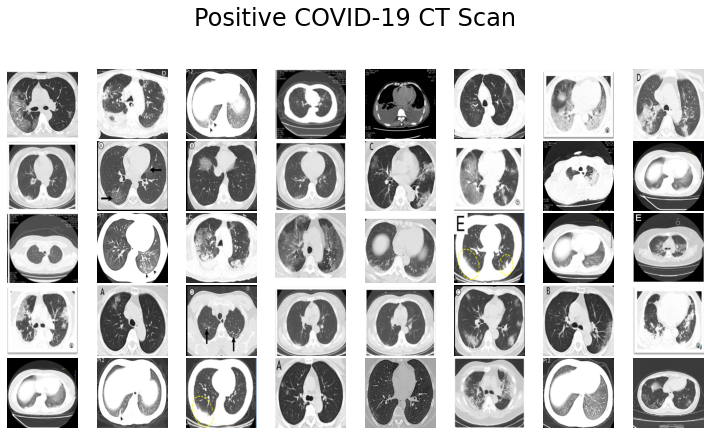

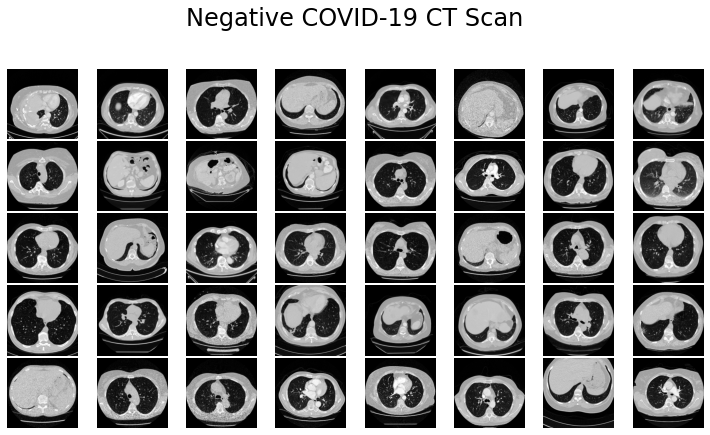

In [5]:
# diaplaying some random input as images.
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(covid_images, 'Positive COVID-19 CT Scan')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')

In [6]:
# Convert to array and Normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

In [7]:
# Split into training(80%) and testing sets(20%) for both types of images
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

# Make labels into categories - either 0 or 1, for resnet ,inception model
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (1011, 224, 224, 3)
Shape of y_train (1011, 2)
Shape of X_test (253, 224, 224, 3)
Shape of y_test (253, 2)


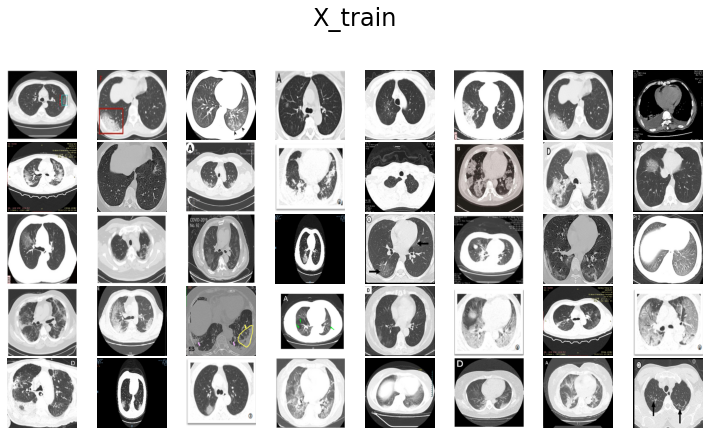

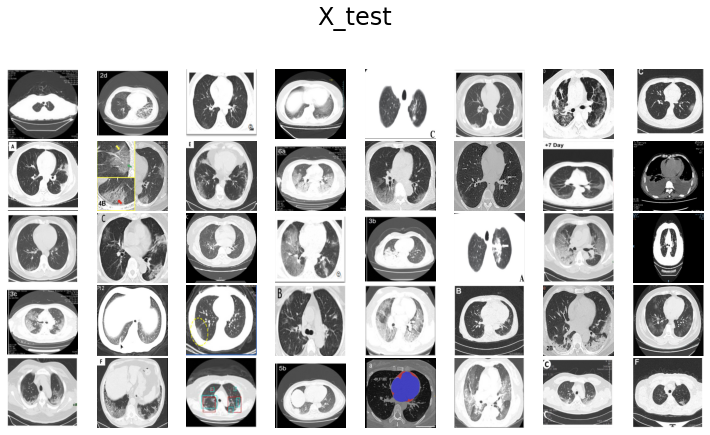

In [8]:
plot_images(covid_x_train, 'X_train')
plot_images(covid_x_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

ResNet Architecture


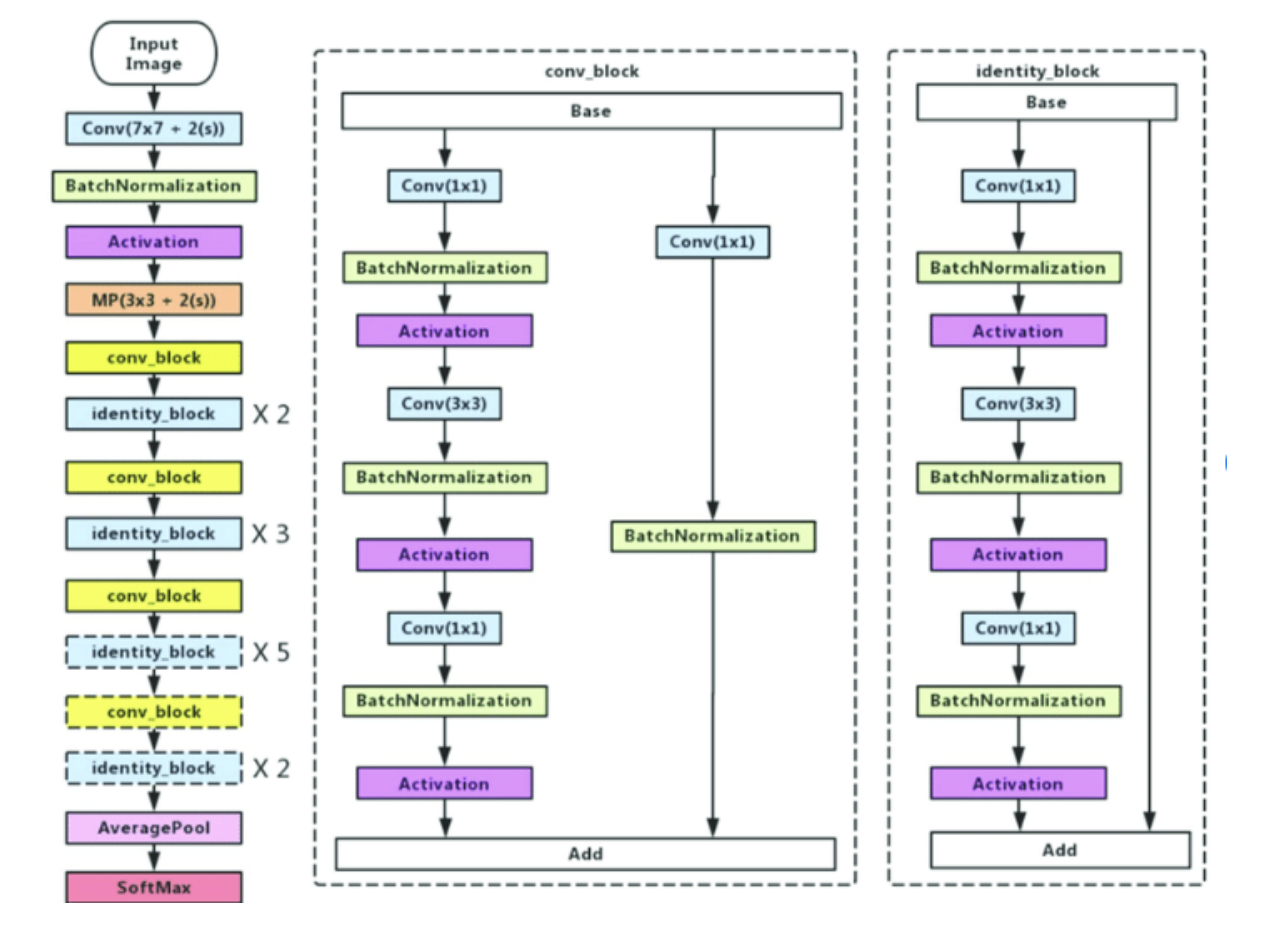

In [9]:
#structure and architecture of resnet50 (TASK 3)
print("ResNet Architecture")
Image("./pro6_image/resnet_structure.png")


Inception Module


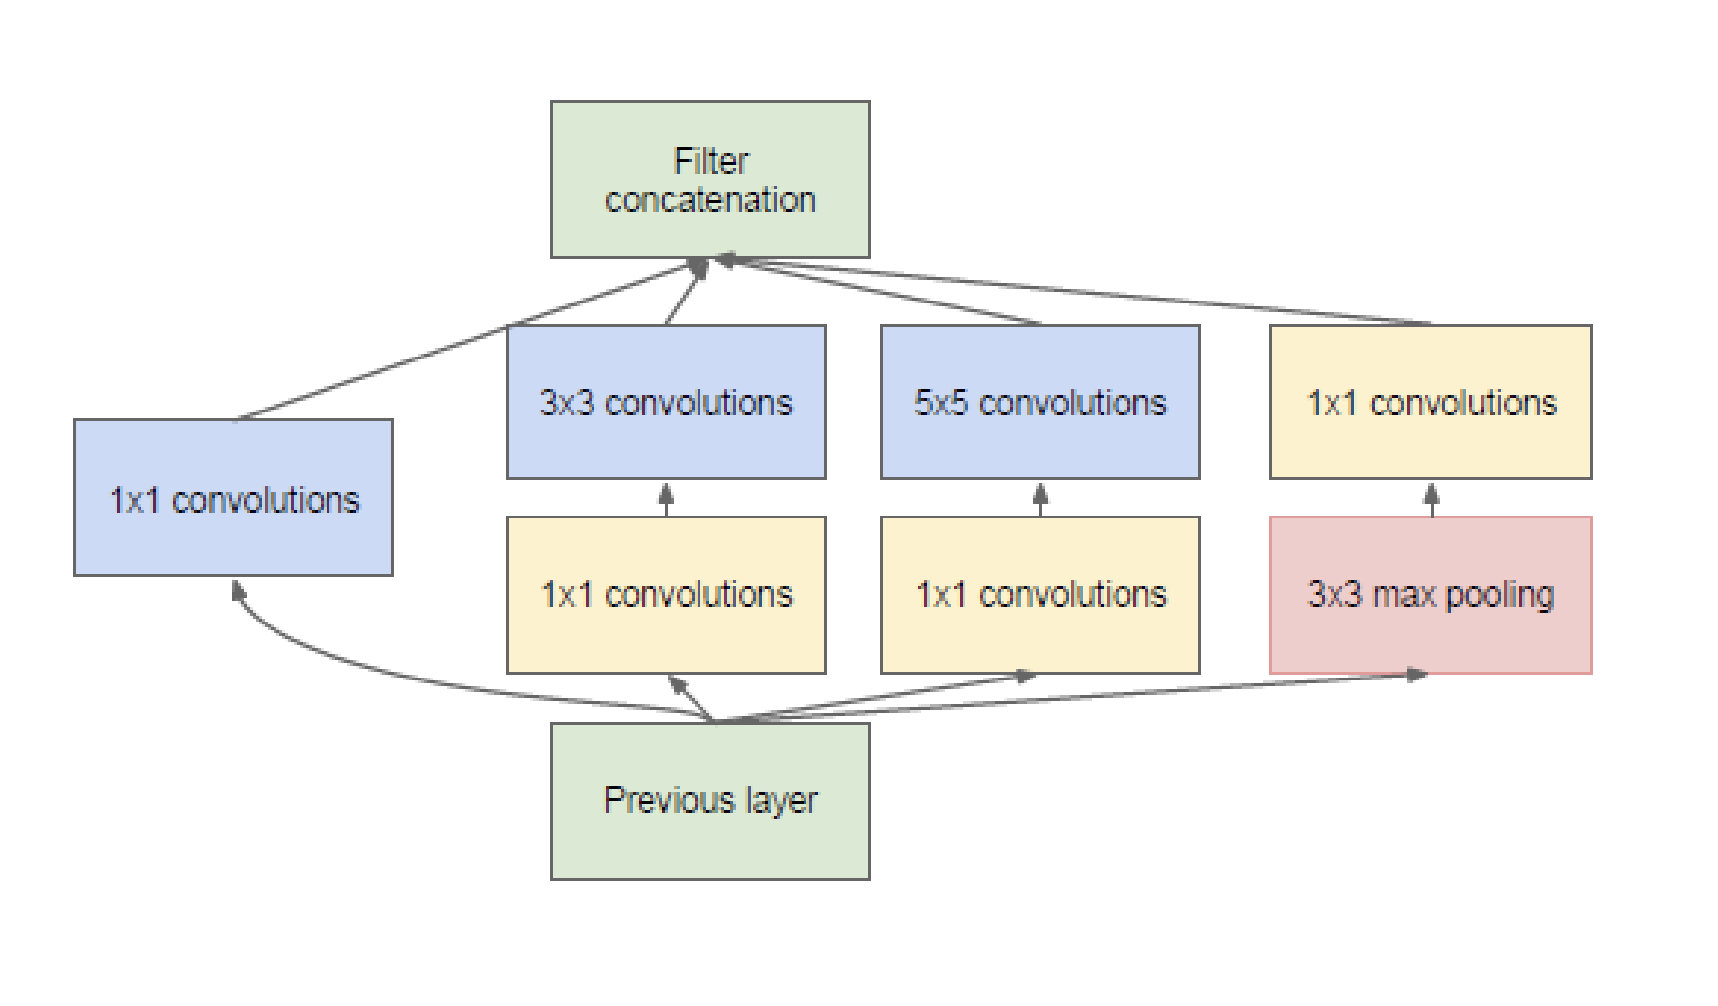

In [10]:
print("Inception Module")
Image("./pro6_image/inception_module.png")


InceptionV3 Structure


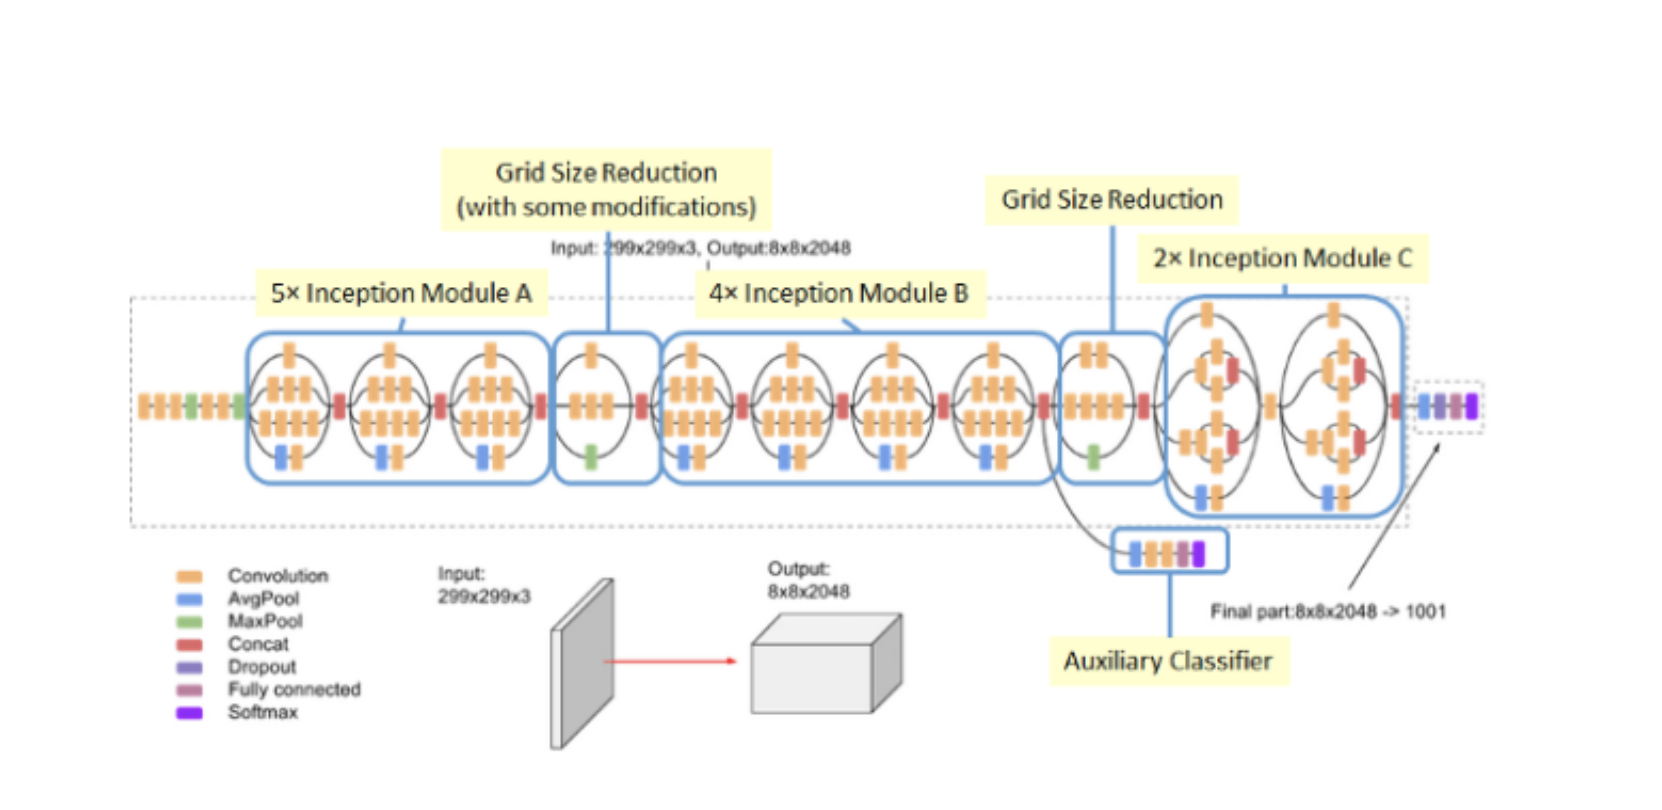

In [11]:
print("InceptionV3 Structure")
Image("./pro6_image/Inceptionv3_structure.png")

In [12]:
# Building Model ResNet50
resnet = ResNet50(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224,224, 3)))

outputs_res = resnet.output
outputs_res = Flatten(name="flatten")(outputs_res)
outputs_res = Dropout(0.5)(outputs_res)
outputs_res = Dense(2, activation="softmax")(outputs_res)

model_res = Model(inputs=resnet.input, outputs=outputs_res)

for layer in resnet.layers:
    layer.trainable = False

model_res.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

In [13]:
#ResNet50 Model summary  (Task 3 structure of the model)
model_res.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
#inception model with optimizer = adam (TASK 2)
inception = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs_inc_1 = inception.output
outputs_inc_1 = Flatten(name="flatten")(outputs_inc_1)
outputs_inc_1 = Dropout(0.5)(outputs_inc_1)
outputs_inc_1 = Dense(2, activation="softmax")(outputs_inc_1)

model_inc_1 = Model(inputs=inception.input, outputs=outputs_inc_1)

for layer in inception.layers:
    layer.trainable = False


model_inc_1.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)


In [15]:
#inception model with optimizer = sgd(TASK 2)
inception_2 = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs_inc_2 = inception_2.output
outputs_inc_2 = Flatten(name="flatten")(outputs_inc_2)
outputs_inc_2 = Dropout(0.5)(outputs_inc_2)
outputs_inc_2 = Dense(2, activation="softmax")(outputs_inc_2)

model_inc_2 = Model(inputs=inception_2.input, outputs=outputs_inc_2)

for layer in inception.layers:
    layer.trainable = False


model_inc_2.compile(
        loss='categorical_crossentropy', 
        optimizer='sgd', 
        metrics=['accuracy']
)

In [16]:
#inception model with optimizer = rmsprop(TASK 2)
inception_3 = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs_inc_3 = inception_3.output
outputs_inc_3 = Flatten(name="flatten")(outputs_inc_3)
outputs_inc_3 = Dropout(0.5)(outputs_inc_3)
outputs_inc_3 = Dense(2, activation="softmax")(outputs_inc_3)

model_inc_3 = Model(inputs=inception_3.input, outputs=outputs_inc_3)

for layer in inception.layers:
    layer.trainable = False


model_inc_3.compile(
        loss='categorical_crossentropy', 
        optimizer='rmsprop', 
        metrics=['accuracy']
)

In [17]:
#inception Model summary  (Task 3 structure of the model)
model_inc_1.summary()
model_inc_2.summary()
model_inc_3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

__________________________________________________________________________________________________
batch_normalization_210 (BatchN (None, 25, 25, 64)   192         conv2d_210[0][0]                 
__________________________________________________________________________________________________
activation_210 (Activation)     (None, 25, 25, 64)   0           batch_normalization_210[0][0]    
__________________________________________________________________________________________________
conv2d_208 (Conv2D)             (None, 25, 25, 48)   13824       mixed1[0][0]                     
__________________________________________________________________________________________________
conv2d_211 (Conv2D)             (None, 25, 25, 96)   55296       activation_210[0][0]             
__________________________________________________________________________________________________
batch_normalization_208 (BatchN (None, 25, 25, 48)   144         conv2d_208[0][0]                 
__________

In [18]:
#Generate the batches of tensor image data with real time augmentation 
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [19]:
#training and calculating accuracy using ResNet50 with adam optimizer
training_adam_resnet = model_res.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/10
31/31 [==============================] - 75s 2s/step - loss: 2.7509 - accuracy: 0.6960 - val_loss: 0.3260 - val_accuracy: 0.8656
Epoch 2/10
31/31 [==============================] - 70s 2s/step - loss: 0.5150 - accuracy: 0.8096 - val_loss: 0.3858 - val_accuracy: 0.8656
Epoch 3/10
31/31 [==============================] - 70s 2s/step - loss: 0.3571 - accuracy: 0.8664 - val_loss: 0.3030 - val_accuracy: 0.9091
Epoch 4/10
31/31 [==============================] - 70s 2s/step - loss: 0.3415 - accuracy: 0.8614 - val_loss: 0.1990 - val_accuracy: 0.9170
Epoch 5/10
31/31 [==============================] - 72s 2s/step - loss: 0.3418 - accuracy: 0.8734 - val_loss: 0.3048 - val_accuracy: 0.9209
Epoch 6/10
31/31 [==============================] - 73s 2s/step - loss: 0.3698 - accuracy: 0.8783 - val_loss: 0.2310 - val_accuracy: 0.9249
Epoch 7/10
31/31 [==============================] - 71s 2s/step - loss: 0.8861 - accuracy: 0.7832 - val_loss: 0.2439 - val_accuracy: 0.9407
Epoch 8/10
31/31 [==

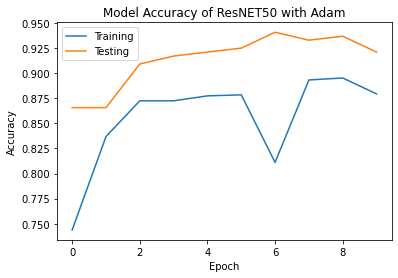

Training Accuracy of ResNet50 with Adam :87.93 %
Testing Accuracy of ResNet50 with Adam :92.09 %


In [20]:
#Graph view -->Model Accuracy of ResNET50 with Adam
plt.plot(training_adam_resnet.history['accuracy'])
plt.plot(training_adam_resnet.history['val_accuracy'])

plt.title('Model Accuracy of ResNET50 with Adam')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('./pro6_accuracy_image/resnet_accuracy.png')
plt.show()

res_acc= np.array(training_adam_resnet.history['accuracy'])
print( 'Training Accuracy of ResNet50 with Adam :%.2f' %(res_acc[-1]*100),'%')

res_vacc = np.array(training_adam_resnet.history['val_accuracy'])
print('Testing Accuracy of ResNet50 with Adam :%.2f' % (res_vacc[-1]*100), '%')

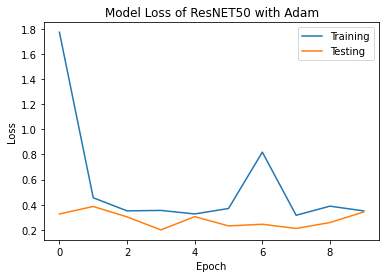

In [21]:
#Graph view -->Model Loss of ResNET50 with Adam
plt.plot(training_adam_resnet.history['loss'])
plt.plot(training_adam_resnet.history['val_loss'])

plt.title('Model Loss of ResNET50 with Adam')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('./pro6_accuracy_image/resnet_loss.png')
plt.show()



In [22]:
#training and calculating accuracy using inception with adam optimizer
training_adam_inc = model_inc_1.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/10
31/31 [==============================] - 25s 685ms/step - loss: 1.6161 - accuracy: 0.8179 - val_loss: 0.1235 - val_accuracy: 0.9486
Epoch 2/10
31/31 [==============================] - 23s 720ms/step - loss: 0.4191 - accuracy: 0.9307 - val_loss: 0.0992 - val_accuracy: 0.9763
Epoch 3/10
31/31 [==============================] - 22s 702ms/step - loss: 0.2466 - accuracy: 0.9637 - val_loss: 0.1415 - val_accuracy: 0.9605
Epoch 4/10
31/31 [==============================] - 21s 669ms/step - loss: 0.0827 - accuracy: 0.9725 - val_loss: 0.2251 - val_accuracy: 0.9526
Epoch 5/10
31/31 [==============================] - 23s 732ms/step - loss: 0.1633 - accuracy: 0.9726 - val_loss: 1.2835 - val_accuracy: 0.7787
Epoch 6/10
31/31 [==============================] - 22s 699ms/step - loss: 0.4973 - accuracy: 0.9411 - val_loss: 0.1284 - val_accuracy: 0.9723
Epoch 7/10
31/31 [==============================] - 22s 707ms/step - loss: 0.2417 - accuracy: 0.9677 - val_loss: 0.1782 - val_accuracy: 0.9684

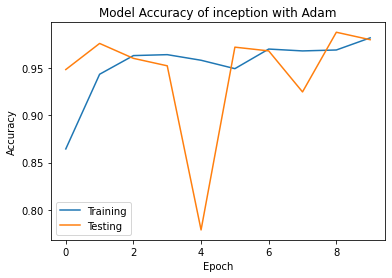

Training Accuracy of Inception with Adam :98.22 %
Testing Accuracy of Inception with Adam :98.02 %


In [23]:
#Graph view -->Model Accuracy of inception with Adam
plt.plot(training_adam_inc.history['accuracy'])
plt.plot(training_adam_inc.history['val_accuracy'])

plt.title('Model Accuracy of inception with Adam')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('./pro6_accuracy_image/inception_accuracy_adam.png')
plt.show()


inc_acc_adam = np.array(training_adam_inc.history['accuracy'])
print('Training Accuracy of Inception with Adam :%.2f' % (inc_acc_adam[-1]*100), '%')

inc_vacc_adam = np.array(training_adam_inc.history['val_accuracy'])
print('Testing Accuracy of Inception with Adam :%.2f' % (inc_vacc_adam[-1]*100), '%')

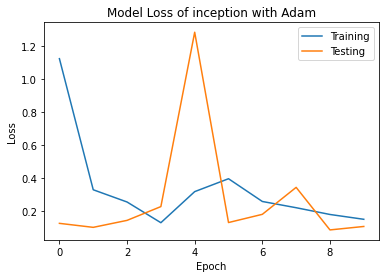

In [24]:
#Graph view -->Model Loss of inception with Adam
plt.plot(training_adam_inc.history['loss'])
plt.plot(training_adam_inc.history['val_loss'])

plt.title('Model Loss of inception with Adam')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('./pro6_accuracy_image/inception_loss_adam.png')
plt.show()

In [25]:
#training and calculating accuracy using inception with sgd optimizer
training_sgd_inc = model_inc_2.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/10
31/31 [==============================] - 126s 4s/step - loss: 1.5446 - accuracy: 0.8393 - val_loss: 0.6300 - val_accuracy: 0.8617
Epoch 2/10
31/31 [==============================] - 131s 4s/step - loss: 0.0324 - accuracy: 0.9877 - val_loss: 0.0889 - val_accuracy: 0.9802
Epoch 3/10
31/31 [==============================] - 128s 4s/step - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.0636 - val_accuracy: 0.9842
Epoch 4/10
31/31 [==============================] - 126s 4s/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.1961 - val_accuracy: 0.9209
Epoch 5/10
31/31 [==============================] - 123s 4s/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0881 - val_accuracy: 0.9605
Epoch 6/10
31/31 [==============================] - 126s 4s/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.4314 - val_accuracy: 0.8458
Epoch 7/10
31/31 [==============================] - 117s 4s/step - loss: 0.0237 - accuracy: 0.9951 - val_loss: 0.4453 - val_accuracy: 0.8142
Epoch 8/10
31

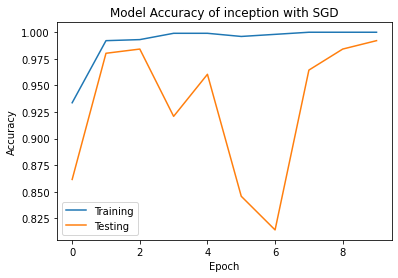

Training Accuracy of Inception with SGD :100.00 %
Testing Accuracy of Inception with SGD  :99.21 %


In [26]:
#Graph view -->Model Accuracy of inception with SGD
plt.plot(training_sgd_inc.history['accuracy'])
plt.plot(training_sgd_inc.history['val_accuracy'])

plt.title('Model Accuracy of inception with SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('./pro6_accuracy_image/inception_accuracy_sgd.png')
plt.show()

inc_acc_sgd = np.array(training_sgd_inc.history['accuracy'])
print('Training Accuracy of Inception with SGD :%.2f' % (inc_acc_sgd[-1]*100), '%')

inc_vacc_sgd = np.array(training_sgd_inc.history['val_accuracy'])
print('Testing Accuracy of Inception with SGD  :%.2f' % (inc_vacc_sgd[-1]*100), '%')

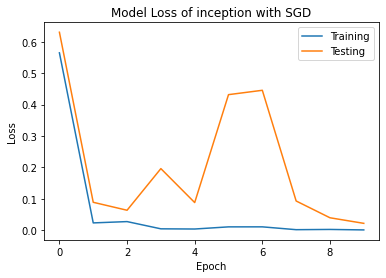

In [27]:
#Graph view -->Model Loss of inception with SGD
plt.plot(training_sgd_inc.history['loss'])
plt.plot(training_sgd_inc.history['val_loss'])

plt.title('Model Loss of inception with SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('./pro6_accuracy_image/inception_loss_sgd.png')
plt.show()

In [28]:
#training and calculating accuracy using inception with rmsprop optimizer
training_rmsprop_inc = model_inc_3.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/10
31/31 [==============================] - 136s 4s/step - loss: 1.3578 - accuracy: 0.8366 - val_loss: 12.4458 - val_accuracy: 0.2095
Epoch 2/10
31/31 [==============================] - 126s 4s/step - loss: 0.0897 - accuracy: 0.9787 - val_loss: 8.0474 - val_accuracy: 0.2095
Epoch 3/10
31/31 [==============================] - 128s 4s/step - loss: 0.4356 - accuracy: 0.9856 - val_loss: 23556.0312 - val_accuracy: 0.7905
Epoch 4/10
31/31 [==============================] - 127s 4s/step - loss: 0.2416 - accuracy: 0.9643 - val_loss: 23168.7148 - val_accuracy: 0.7905
Epoch 5/10
31/31 [==============================] - 124s 4s/step - loss: 0.2041 - accuracy: 0.9774 - val_loss: 257.4254 - val_accuracy: 0.3874
Epoch 6/10
31/31 [==============================] - 125s 4s/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 116.2793 - val_accuracy: 0.7945
Epoch 7/10
31/31 [==============================] - 128s 4s/step - loss: 0.0762 - accuracy: 0.9794 - val_loss: 14.8799 - val_accuracy: 0.5375

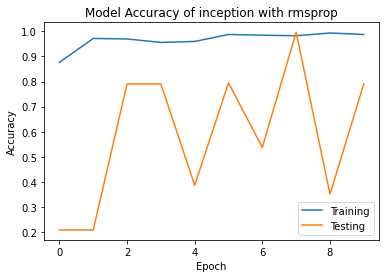

Training Accuracy of Inception with Rmsprop :98.71 %
Testing Accuracy of Inception with Rmsprop :79.05 %


In [29]:
# Graph view -->Model Accuracy of inception with rmsprop
plt.plot(training_rmsprop_inc.history['accuracy'])
plt.plot(training_rmsprop_inc.history['val_accuracy'])

plt.title('Model Accuracy of inception with rmsprop')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('./pro6_accuracy_image/inception_accuracy_rms.png')
plt.show()

inc_acc_rms = np.array(training_rmsprop_inc.history['accuracy'])
print('Training Accuracy of Inception with Rmsprop :%.2f' % (inc_acc_rms[-1]*100), '%')

inc_vacc_rms = np.array(training_rmsprop_inc.history['val_accuracy'])
print('Testing Accuracy of Inception with Rmsprop :%.2f' % (inc_vacc_rms[-1]*100), '%')

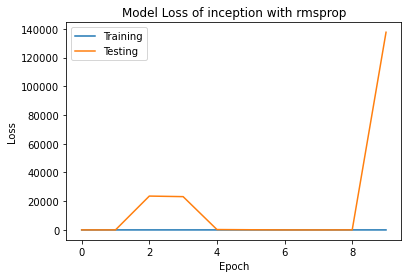

In [30]:
# Graph view -->Model Loss of inception with rmsprop
plt.plot(training_rmsprop_inc.history['loss'])
plt.plot(training_rmsprop_inc.history['val_loss'])

plt.title('Model Loss of inception with rmsprop')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('./pro6_accuracy_image/inception_loss_rms.png')
plt.show()

In [31]:
from prettytable import PrettyTable

r =[["ResNet50 with Adam optimizer",'%.2f' %(res_acc[-1]*100),'%.2f' %(res_vacc[-1]*100)],
    ["Inception With Adam optimizer",'%.2f' %(inc_acc_adam[-1]*100),'%.2f' %(inc_vacc_adam[-1]*100)],[" Inception with SGD optimizer",'%.2f' %(inc_acc_sgd[-1]*100),'%.2f' %(inc_vacc_sgd[-1]*100)],
    ["Inception with Rmsprop ",'%.2f' %(inc_acc_rms[-1]*100),'%.2f' %(inc_vacc_rms[-1]*100)] ]
t= PrettyTable(["Different DCCN Model With Differnt Optimizers for Covid19-ct Images ", "Training Accuracy"," Testing Accuracy"])

for rec in r:
    t.add_row(rec)

print(t)

+----------------------------------------------------------------------+-------------------+-------------------+
| Different DCCN Model With Differnt Optimizers for Covid19-ct Images  | Training Accuracy |  Testing Accuracy |
+----------------------------------------------------------------------+-------------------+-------------------+
|                     ResNet50 with Adam optimizer                     |       87.93       |       92.09       |
|                    Inception With Adam optimizer                     |       98.22       |       98.02       |
|                     Inception with SGD optimizer                     |       100.00      |       99.21       |
|                       Inception with Rmsprop                         |       98.71       |       79.05       |
+----------------------------------------------------------------------+-------------------+-------------------+


In [32]:
#Save the trained model in local machine (which will be useful for GUI TASK4) 
model_res.save('./pro6_savedModel/resnet.h5')
model_inc_1.save('./pro6_savedModel/inception_adam.h5')
model_inc_2.save('./pro6_savedModel/inception_sgd.h5')
model_inc_3.save('./pro6_savedModel/inception_rmsprop.h5')

In [33]:
#figure out the best model from the above and load for testing samples and also for GUI testing .
best_model = load_model('./pro6_savedModel/inception_sgd.h5')
y_pred = best_model.predict(X_test, batch_size=batch_size)

# Convert to Binary classes 
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

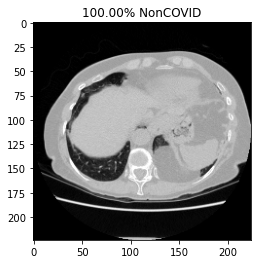

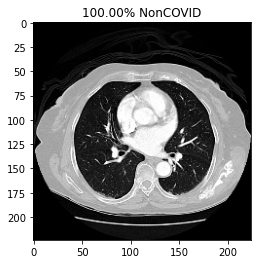

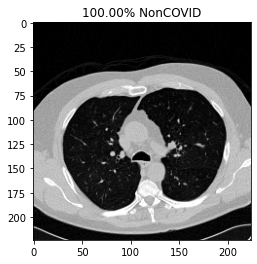

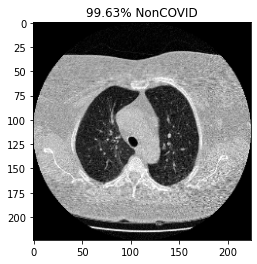

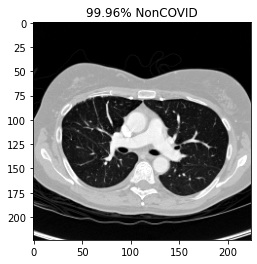

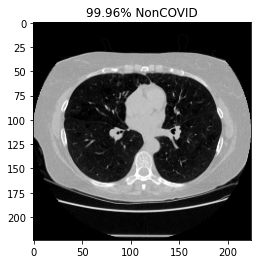

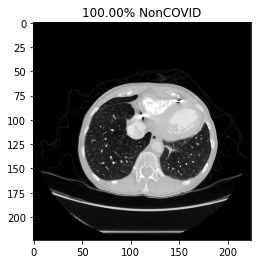

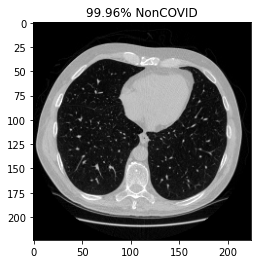

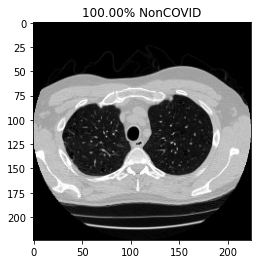

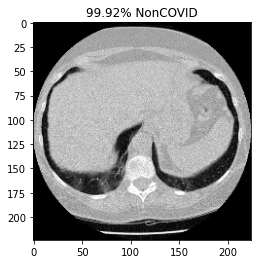

In [34]:
#Testing the model
prediction=y_pred[200:210]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

Confusion Matrix without Normalization


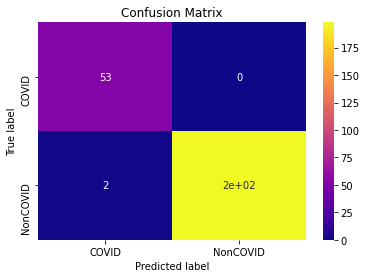

Confusion Matrix with Normalized Values


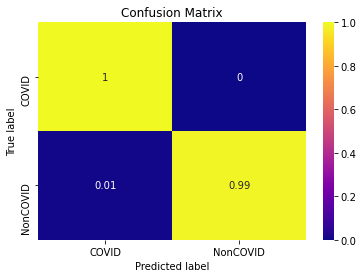

In [35]:
#confusion_matrix for best model
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)
print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [36]:
#TASK 4 GUI 
# This allows the user to import the image from local machine and with the saved model(already trained model) it performs testing.
image_size = 224
class GUI_covid19_detector(object):
    def retranslateUi(self, MainScreen):
        _translate = QtCore.QCoreApplication.translate
        MainScreen.setWindowTitle(_translate("MainScreen", "COVID-19 Detector"))
        self.predictedLabel.setText(_translate("MainScreen", "Your Covid Test Result:"))
        self.browseImageBtn.setText(_translate("MainScreen", "Browse Image"))
        self.predictBtn.setText(_translate("MainScreen", "Start Testing"))
        
    def setupUi(self, GuiWindow):            
        GuiWindow.setObjectName("MainScreen")
        GuiWindow.resize(547, 592)
        GuiWindow.setMaximumSize(QtCore.QSize(547, 700))
        self.centralwidget = QtWidgets.QWidget(GuiWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.InputImage = QtWidgets.QLabel(self.centralwidget)
        self.InputImage.setGeometry(QtCore.QRect(20, 40, 280, 350))
        self.InputImage.setText("")
        self.InputImage.setObjectName("InputImage")
        
        self.predictedLabel = QtWidgets.QLabel(self.centralwidget)
        self.predictedLabel.setGeometry(QtCore.QRect(40, 400, 361, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe UI")
        font.setPointSize(14)
        self.predictedLabel.setFont(font)
        self.predictedLabel.setObjectName("predictedLabel")
        
        
        self.probabilityLabel = QtWidgets.QLabel(self.centralwidget)
        self.probabilityLabel.setGeometry(QtCore.QRect(40, 450, 361, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe UI")
        font.setPointSize(14)
        self.probabilityLabel.setFont(font)
        self.probabilityLabel.setObjectName("probabilityLabel")

        self.browseImageBtn = QtWidgets.QPushButton(self.centralwidget)
        self.browseImageBtn.setGeometry(QtCore.QRect(380, 20, 161, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe UI")
        font.setPointSize(11)
        self.browseImageBtn.setFont(font)
        self.browseImageBtn.setObjectName("browseImageBtn")
        self.browseImageBtn.clicked.connect(self.browseImage)

        self.predictBtn = QtWidgets.QPushButton(self.centralwidget)
        self.predictBtn.setGeometry(QtCore.QRect(380, 80, 161, 41))
        font = QtGui.QFont()
        font.setFamily("Segoe UI")
        font.setPointSize(11)
        self.predictBtn.setFont(font)
        self.predictBtn.setObjectName("predictBtn")
        self.predictBtn.clicked.connect(self.prediction)

        
        GuiWindow.setCentralWidget(self.centralwidget)
        self.retranslateUi(GuiWindow)
        QtCore.QMetaObject.connectSlotsByName(GuiWindow)

  
    def browseImage(self):
        fm = QtWidgets.QFileDialog.getOpenFileName(None,"OpenFile")
        filename = fm[0]
        self.image = cv2.imread(filename)        
        self.InputImage.setPixmap(QtGui.QPixmap(filename))
        self.InputImage.setScaledContents(True)
    
    def prediction(self):
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        self.image = cv2.resize(self.image, (image_size,image_size))
        self.image = np.array(self.image) / 255
        self.image = np.expand_dims(self.image, axis=0)
        print("Testing using Inception DCNN Model")        
        try:
            inc_pred = best_model.predict(self.image)
            probability = inc_pred[0]
            if probability[0] > 0.5: 
                self.predictedLabel.setText("Your Covid Test Result: COVID POSITIVE")
                self.probabilityLabel.setText("COVID-19 Positive with Probability: " + str('%.2f' %(probability[0]*100)+'%'))
            else:
                self.predictedLabel.setText("Your Covid Test Result: COVID NEGATIVE")
                self.probabilityLabel.setText("COVID-19 Negative with Probability: " + str('%.2f' %((1-probability[0])*100)+'%'))
            print("Testing completed")
        except:
            msgError = QtWidgets.QMessageBox()
            msgError.setIcon(QtWidgets.QMessageBox.Critical)
            msgError.setWindowTitle("Error")
            msgError.setText("Oops!! Error")
            msgError.exec_()


In [37]:
# run the gui by calling the main function below.
if __name__ == "__main__":
    app = QtWidgets.QApplication(sys.argv)
    MainScreen = QtWidgets.QMainWindow()
    obj = GUI_covid19_detector()
    obj.setupUi(MainScreen)
    MainScreen.show()
    sys.exit(app.exec_())

Testing using Inception DCNN Model
Testing completed
Testing using Inception DCNN Model
Testing completed
Testing using Inception DCNN Model
Testing completed
Testing using Inception DCNN Model
Testing completed
Testing using Inception DCNN Model
Testing completed


SystemExit: 0

/Users/sabareeswarans/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
